In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [213]:
#pip install plotly --upgrade

In [214]:
stardata=pd.read_csv("stardata.csv")
stardropped=stardata.drop('row.names',axis=1)

In [215]:
stardropped_Copy=stardata.drop('north.south',axis=1)

In [216]:
#applied pca looked at loadings and realised that angle and north.south is not contibuting much

In [217]:
stardropped_Copy=stardropped_Copy.drop('angle',axis=1)

In [218]:
stardropped_Copy=stardropped_Copy.drop('row.names',axis=1)

In [219]:
stardropped_Copy.head()

east.west  radial.position  velocity
0   8.462789        39.099998      1769
1   7.964978        36.799999      1749
2   7.467167        34.500001      1749
3   6.969356        32.200000      1758
4   6.471544        29.899999      1750

In [220]:
#stardropped_Copy=stardropped_Copy.drop('row.names',axis=1)
chu=stardropped_Copy
#stardropped_Copy.shape
#scaling the data
stardropped_Copy = scaler.fit_transform(stardropped_Copy.to_numpy())
stardropped_Copy = pd.DataFrame(stardropped_Copy, columns=chu.columns)

In [221]:
stardropped_Copy

east.west  radial.position  velocity
0     0.644616         0.846438  0.983607
1     0.636200         0.825162  0.928962
2     0.627784         0.803885  0.928962
3     0.619368         0.782609  0.953552
4     0.610952         0.761332  0.931694
..         ...              ...       ...
318   0.347863         0.096207  0.128415
319   0.339447         0.074931  0.106557
320   0.331763         0.055504  0.000000
321   0.323347         0.034228  0.019126
322   0.314565         0.012026  0.054645

[323 rows x 3 columns]

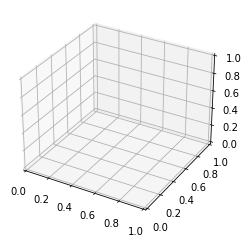

In [222]:
from mpl_toolkits import mplot3d
%matplotlib inline
ax = plt.axes(projection='3d')

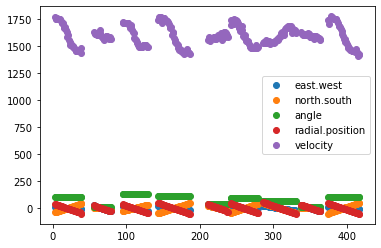

In [223]:
for i in stardropped.columns:
    plt.scatter(stardata['row.names'],stardropped[i],label=i)
    plt.legend()

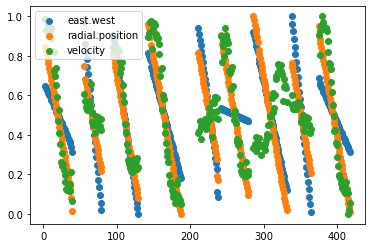

In [224]:
for i in chu.columns:
    plt.scatter(stardata['row.names'],stardropped_Copy[i],label=i)
    plt.legend()

In [225]:
stardata.columns

Index(['row.names', 'east.west', 'north.south', 'angle', 'radial.position',
       'velocity'],
      dtype='object')

In [226]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(stardropped.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=stardropped.columns)
 

In [227]:
df_scaled.shape

(323, 5)

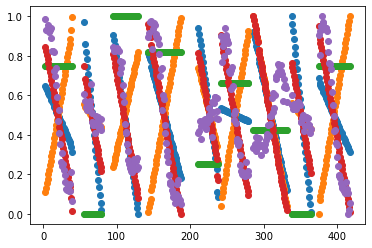

In [228]:
for i in stardropped.columns:
    plt.scatter(stardata['row.names'],df_scaled[i])

In [229]:
df_scaled['north.south'].corr(df_scaled['velocity'])

-0.8944955433730692

In [230]:
df_scaled['east.west'].corr(df_scaled['radial.position'])

0.8476414377469639

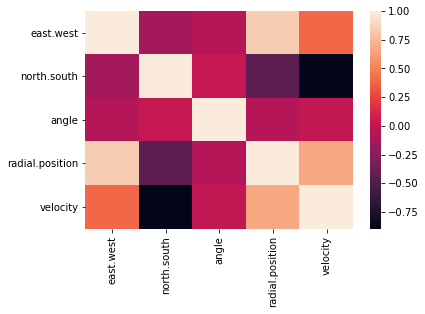

In [231]:
import seaborn as sns;
corr = df_scaled.corr()

ax = sns.heatmap(corr)

In [232]:
from sklearn.decomposition import KernelPCA
lin_transformer = KernelPCA(n_components=3, kernel='linear')
kpca_X = lin_transformer.fit_transform(df_scaled)



In [233]:
#kpca_X=pd.DataFrame(kpca_X)

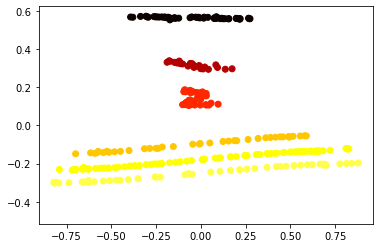

In [234]:
plt.scatter(kpca_X[:, 0], kpca_X[:, 1], c=df_scaled['angle'], cmap=plt.cm.hot)

In [235]:
#ax.scatter3D(kpca_X[:, 0], kpca_X[:,1],kpca_X[:, 2], cmap='Greens')
%matplotlib widget
%matplotlib notebook
from mpl_toolkits import mplot3d
%matplotlib inline
ax = plt.axes(projection='3d')
#ax.plot3D(kpca_X[:, 0], kpca_X[:,1],kpca_X[:, 2],'green')
ax.scatter(kpca_X[:, 0], kpca_X[:,1],kpca_X[:,2],c=df_scaled['velocity'])#, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
plt.show()
#ax.plot3D(kpca_X[:, 0], kpca_X[:,1],kpca_X[:, 2], 'gray')
#plt.scatter(kpca_X[:, 0], kpca_X[:, 2], c=df_scaled['angle'], cmap=plt.cm.hot)

ModuleNotFoundError: No module named 'ipympl'

In [236]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(#kpca_X[:, 0], kpca_X[:,1],kpca_X[:, 2],
     x=kpca_X[:,0],  # <-- Put your data instead
    y=kpca_X[:,1],  # <-- Put your data instead
    z=kpca_X[:, 2],mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)


In [237]:
#import plotly.plotly as ppy


import glob

import plotly.graph_objects as go
u_labels = np.unique(label)
PLOT = go.Figure()

for i in u_labels:
    
    PLOT.add_trace(go.Scatter3d(x =  kpca_X[label == i , 0],
                                y =  kpca_X[label == i , 1],
                                z =  kpca_X[label == i , 2],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(i)))
    
    
    
  #  for i in u_labels:
   # plt.scatter(kpca_X[label == i , 0] , kpca_X[label == i , 1] , label = i)
#plt.legend()
#plt.show()


In [239]:
PLOT

In [240]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state=0).fit(kpca_X)

In [241]:
clustering.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [242]:
#import plotly.plotly as ppy


import glob

import plotly.graph_objects as go
xu_labels = np.unique(clustering.labels_)
XPLOT = go.Figure()

for i in xu_labels:
    
    XPLOT.add_trace(go.Scatter3d(x =  kpca_X[clustering.labels_ == i , 0],
                                y =  kpca_X[clustering.labels_ == i , 1],
                                z =  kpca_X[clustering.labels_ == i , 2],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(i)))
    
    
    
  #  for i in u_labels:
   # plt.scatter(kpca_X[label == i , 0] , kpca_X[label == i , 1] , label = i)
#plt.legend()
#plt.show()


In [153]:
XPLOT

In [154]:
xu_labels

array([0, 1, 2], dtype=int64)

In [155]:
XPLOT

In [156]:
#import plotly.plotly as ppy

-
+3.02
slabel = skmeans.fit_predict(stardropped_Copy)
#import plotly.graph_objects as go
su_labels = np.unique(slabel)
PLOT = go.Figure()

for i in su_labels:
    
    PLOT.add_trace(go.Scatter3d(x =  stardropped_Copy[label == i , 0],
                                y =  stardropped_Copy[label == i , 1],
                                z =  stardropped_Copy[label == i , 2],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(i)))
    
    
    
  #  for i in u_labels:
   # plt.scatter(kpca_X[label == i , 0] , kpca_X[label == i , 1] , label = i)
#plt.legend()
#plt.show()


SyntaxError: invalid syntax (<ipython-input-156-b0b9f207bd0d>, line 3)

In [157]:
slabel.shape

NameError: name 'slabel' is not defined

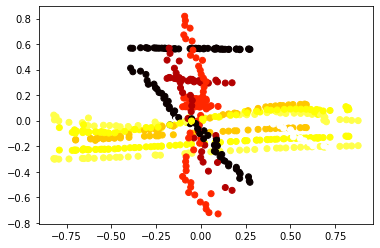

In [158]:
plt.scatter(kpca_X[:, 0], kpca_X[:, 1], c=df_scaled['angle'], cmap=plt.cm.hot)
plt.scatter(kpca_X[:, 0], kpca_X[:, 2], c=df_scaled['angle'], cmap=plt.cm.hot)

In [159]:
rbf_transformer = KernelPCA(n_components=3, kernel='rbf')
kpca_X1 = rbf_transformer.fit_transform(df_scaled)


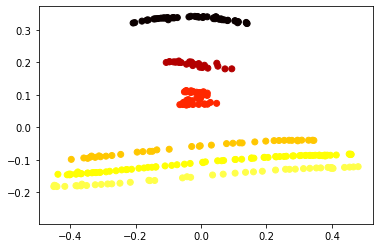

In [160]:
plt.scatter(kpca_X1[:, 0], kpca_X1[:, 1], c=df_scaled['angle'], cmap=plt.cm.hot)

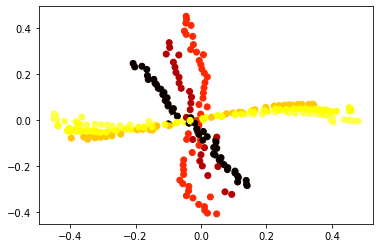

In [161]:
plt.scatter(kpca_X1[:, 0], kpca_X1[:, 2], c=df_scaled['angle'], cmap=plt.cm.hot)

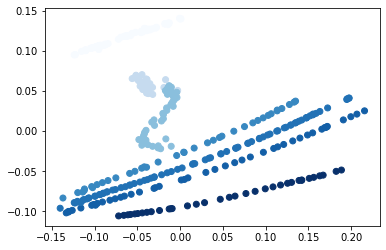

In [162]:
from sklearn.decomposition import KernelPCA
sig_transformer = KernelPCA(n_components=3, kernel='sigmoid')
kpca_X2 = sig_transformer.fit_transform(df_scaled)

plt.scatter(kpca_X2[:, 0], kpca_X2[:, 1], c=df_scaled['angle'], cmap=plt.cm.Blues)

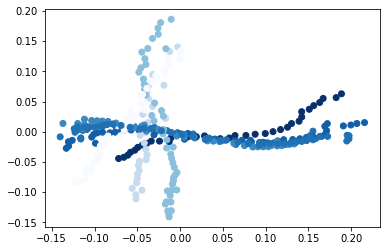

In [163]:
plt.scatter(kpca_X2[:, 0], kpca_X2[:, 2], c=df_scaled['angle'], cmap=plt.cm.Blues)

In [164]:
from sklearn.decomposition import KernelPCA
sig3_transformer = KernelPCA(n_components=2, kernel='poly')
kpca_X3 = sig3_transformer.fit_transform(df_scaled)

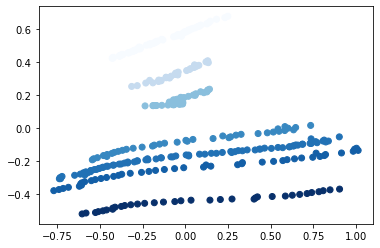

In [165]:
plt.scatter(kpca_X3[:, 0], kpca_X3[:, 1], c=df_scaled['angle'], cmap=plt.cm.Blues)

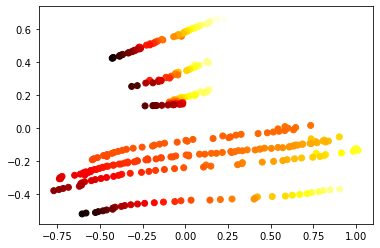

In [166]:
plt.scatter(kpca_X3[:, 0], kpca_X3[:, 1], c=df_scaled['east.west'], cmap=plt.cm.hot)

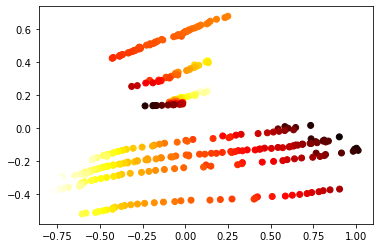

In [167]:
plt.scatter(kpca_X3[:, 0], kpca_X3[:, 1], c=df_scaled['north.south'], cmap=plt.cm.hot)

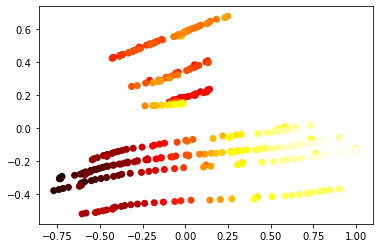

In [168]:
plt.scatter(kpca_X3[:, 0], kpca_X3[:, 1], c=df_scaled['velocity'], cmap=plt.cm.hot)

C:\Users\gnana\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



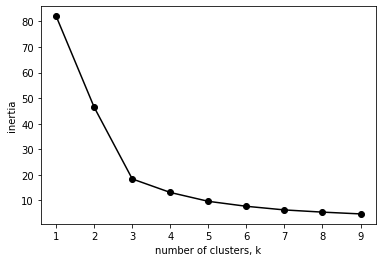

In [169]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
KPCA_components = pd.DataFrame(kpca_X)
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(KPCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [170]:
#elbow point =3

In [171]:
from sklearn.cluster import KMeans
kmeans = KMeans(init=KPCA_components, n_clusters=3, n_init=10)

In [172]:
kmeans

KMeans(init=            0         1         2
0   -0.718705 -0.232973 -0.091539
1   -0.660205 -0.227632 -0.077519
2   -0.635385 -0.226778 -0.080178
3   -0.625722 -0.227942 -0.090344
4   -0.587430 -0.225293 -0.086331
..        ...       ...       ...
318  0.683549 -0.132633  0.075715
319  0.721840 -0.129984  0.079727
320  0.810177 -0.120455  0.109824
321  0.823209 -0.121171  0.101326
322  0.827216 -0.123195  0.087710

[323 rows x 3 columns],
       n_clusters=3)

In [173]:
kkmeans=KMeans(n_clusters=3, n_init=10)
label = kkmeans.fit_predict(kpca_X)

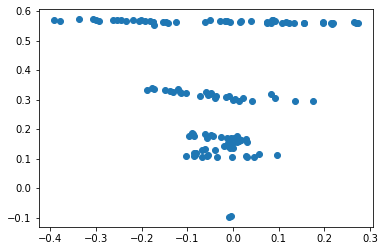

In [174]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = kpca_X[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

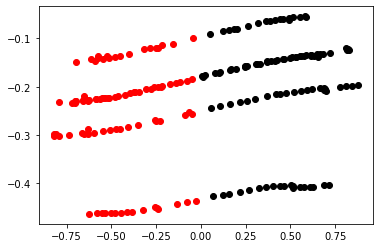

In [175]:
#filter rows of original data
filtered_label2 = kpca_X[label == 1]
 
filtered_label8 = kpca_X[label == 2]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

In [176]:
ax.scatter(kpca_X[:,0],kpca_X[:,1],kpca_X[:,2], c=df_scaled['velocity'] , cmap='Set2', s=50)

TypeError: multiple values for argument 's'

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(kpca_X[label == i , 0] , kpca_X[label == i , 1] , label = i)
plt.legend()
plt.show()

Spectral CLustering

In [177]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state=0).fit(kpca_X)


In [178]:
clustering.labels_



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [179]:
clustering


SpectralClustering(assign_labels='discretize', n_clusters=3, random_state=0)

In [180]:
sc_kpca_X=pd.DataFrame(kpca_X)

In [181]:
sc_kpca_X

0         1         2
0   -0.718705 -0.232973 -0.091539
1   -0.660205 -0.227632 -0.077519
2   -0.635385 -0.226778 -0.080178
3   -0.625722 -0.227942 -0.090344
4   -0.587430 -0.225293 -0.086331
..        ...       ...       ...
318  0.683549 -0.132633  0.075715
319  0.721840 -0.129984  0.079727
320  0.810177 -0.120455  0.109824
321  0.823209 -0.121171  0.101326
322  0.827216 -0.123195  0.087710

[323 rows x 3 columns]

In [182]:
#Getting unique labels
 
su_labels = np.unique(clustering.labels_)
 
#plotting the results:
 
for i in su_labels:
    plt.scatter(kpca_X[clustering.labels_ == i , 0] , kpca_X[clustering.labels_ == i , 2] , label = i)
    plt.scatter(kpca_X[clustering.labels_ == i , 0] , kpca_X[clustering.labels_ == i , 1] , label = i)
plt.legend()
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAD4CAYAAADvsV2wAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAA0O0lEQVR4nO2de5QdVZ3vP78+6dCdCAnBYDrpIMk1E3nYEIyIoo4aDZKoiYgJqCOM3stiXZmJuIZrcCC2wGgYrkJmideVQe8wjgIZjcDYKFHQi8KANgTCywgTGNJJAzEhcUw6pNP9u3/UqaT6dO16nKpz+jx+n7V6pc+uXbX3OafzrV2/1xZVxTAMw2h8WsZ6AoZhGEZ1MME3DMNoEkzwDcMwmgQTfMMwjCbBBN8wDKNJGDfWE4jita99rR5//PFjPQ3DMIy64eGHH/6Dqk4NO1bTgn/88cfT29s71tMwDMOoG0TkP13HzKRjGIbRJJjgG4ZhNAkm+IZhGE1CTdvwDcMwxoLBwUH6+vrYv3//WE/FSVtbG52dnbS2tiY+xwTfMAyjhL6+Po488kiOP/54RGSspzMKVWXnzp309fUxa9asxOeZScdoXDatg+tPhu7J3r+b1o31jIw6Yf/+/RxzzDE1KfYAIsIxxxyT+gnEVvhGY7JpHfzbX8PggPd6z1bvNUDXsrGbl1E31KrY+5Qzv1xW+CLyARHZLCLPisjKkOOTROTfROQxEXlSRP4yj3ENw8k9Vx0We5/BAa/dMJqUzIIvIgXgRuBs4ETgfBE5saTbZ4GnVPUU4N3A10RkfNaxDcPJnr507YZRg/z0pz9l7ty5vOENb2D16tWZr5fHCv904FlV3aKqB4BbgSUlfRQ4UrxnkNcAu4CDOYxtGOFM6kzXbhg1xtDQEJ/97Gf5yU9+wlNPPcUtt9zCU089lemaeQj+DGBr4HVfsS3IN4ATgO3A48AKVR3OYWzDCGfBKmgpCVdrafXaDSNnbt+4jTNX38uslT2cufpebt+4LfM1f/Ob3/CGN7yB2bNnM378eM477zzuuOOOTNfMQ/DDPAel+yaeBTwKTAdOBb4hIkeFXkzkIhHpFZHeHTt25DA9o2kpdWrVuBPOqE9u37iNy9c/zrbdAyiwbfcAl69/PLPob9u2jZkzZx563dnZybZt2a6Zh+D3ATMDrzvxVvJB/hJYrx7PAs8Bbwy7mKquVdX5qjp/6tTQgm+GEc89V8HQgZFtQwfMaWvkznV3b2ZgcGhE28DgENfdvTnTdcP2G88aOZSH4P8WmCMis4qO2POAO0v6vAAsABCR1wFzgS05jG0Y4ZjT1qgS23cPpGpPSmdnJ1u3HraW9/X1MX369EzXzCz4qnoQuAS4G3gaWKeqT4rIxSJycbHb1cDbReRx4B7gC6r6h6xjG4YTc9oaVWL65PZU7Ul5y1vewjPPPMNzzz3HgQMHuPXWW/nwhz+c6Zq5JF6p6l3AXSVt3wr8vh1YmMdYhpGIOQuh99vh7YaRI5edNZfL1z8+wqzT3lrgsrPmZrruuHHj+MY3vsFZZ53F0NAQn/70pznppJOyXTPT2YZRqzyzIV27YZTJ0nleUOJ1d29m++4Bpk9u57Kz5h5qz8KiRYtYtGhR5uv4mOAbjYnThr/Vq6uzp88z7yxYZaUWjMwsnTcjF4GvNFY8zWhMnLZ68UQfPVxfx4qqGU2CCb7RmCxYBa2lTjNhVIqI1dcxmggTfKMx6VoGH/oHmDQTkOK/o+OaAQvVNJoGs+EbjUvXspH2+etPLppzSrBQTaNJsBW+0TyEmXla262+jtE0mOAbzUOYmedD/2BROkZN8ulPf5pjjz2Wk08+ObdrmknHaEw2rfOcsaXhl6VmHsOoUS688EIuueQSPvWpT+V2TVvhG42Hv72hhV8a1aIC+ye/613vYsqUKdnnFsAE32g8bHtDo5rU0QLDBN9oPKxSplFN6miBYYJvNB6uMEtpqclVl1Hn1NECwwTfaDxCs2wBHarZR22jjqmjUtwm+Ebj4YdfSmH0Mf9RuwJONqNJqVB+x/nnn8/b3vY2Nm/eTGdnJ9/+dki575RYWKbRmHQtg/UXhR/znWq+3dV/7Z9nGGnw/2bCwoAzcMstt+QwuZGY4BuNy6TO8FIKUnA72UzwjXKok/yOXEw6IvIBEdksIs+KyEpHn3eLyKMi8qSI/L88xjWMSFyP2joU3r8GnWyGkSeZBV9ECsCNwNnAicD5InJiSZ/JwDeBD6vqScDHso5rGLG4SilMmhnevwadbIaRJ3mYdE4HnlXVLQAiciuwBHgq0OfjwHpVfQFAVV/OYVzDiMf1qB204YMVUTOagjxMOjOAoKG0r9gW5M+Ao0XklyLysIg4i0OIyEUi0isivTt27MhheoZRghVRM5qUPFb4EtJWutPEOODNwAKgHfh3EXlQVX8/6kTVtcBagPnz5zt2rDCaAlcBtDyoEyebYeRJHiv8PiBoFO0Etof0+amq7lXVPwD3AafkMLbRqNRRfRLDqARbt27lPe95DyeccAInnXQSa9asyXzNPAT/t8AcEZklIuOB84A7S/rcAbxTRMaJyATgrcDTOYxtNCrVqE9iyVdGDTNu3Di+9rWv8fTTT/Pggw9y44038tRTT8WfGHXNrJNS1YMicglwN1AAvqOqT4rIxcXj31LVp0Xkp8AmYBi4SVWfyDq20cBUuj6J/wRhyVdGDvRs6WHNI2t4ce+LTJs4jRWnrWDx7MWZrtnR0UFHRwcARx55JCeccALbtm3jxBNPjDnTTS6JV6p6F3BXSdu3Sl5fB1yXx3hGE+BKmsordDLqCcIE30hBz5Yeuh/oZv/QfgD69/bT/UA3QGbR93n++efZuHEjb33rWzNdx2rpGLVJaAE0gTkL87l+HVU4NGqbNY+sOST2PvuH9rPmkew2d4A//elPfPSjH+WGG27gqKOOynQtE3yjNulaBqd8nJFBYAqPfT8fW3sdVTg0apsX976Yqj0Ng4ODfPSjH+UTn/gE55xzTubrmeAbtcszGxgV4ZuH43bTOjiwd3S7JV8ZZTBt4rRU7UlRVT7zmc9wwgkn8PnPfz7TtXxM8I3apRJmF99ZO7BrZHv7FEu+MspixWkraCu0jWhrK7Sx4rQVma57//33893vfpd7772XU089lVNPPZW77ror/sQIrFqmUbtUwnEb5qwFGD/RxN4oC98xm3eUzjve8Q5U8809NcE3apcFq/KveeN8atjqxeJXIqvXaHgWz16cW0ROJTGTjlG7VKLmjfPpQCyr12h4bIVv1B6VrKET9tSAEOkcrtRcjJpGVREJKxVWG5Rj7rEVvlFblFNDJ02JhLCnhlG1/or4Y9vKv+loa2tj586dudvQ80JV2blzJ21tbfGdA0itviHwqmX29vaO9TSManL9yQ5H7Uy4NKQaR2mJBPDs/GlMP64xpRC+O5ZrLkbDMDg4SF9fH/v374/vPEa0tbXR2dlJa2vriHYReVhV54edYyYdo7ZIG4qZR4kEl3M4LJonai5Gw9Da2sqsWbPGehq5YyYdo7ZImwGbR6y+bYVoNAm2wjdqi7ShmHnF6ttWiEYTYCt8o7ZIG4oZVmQtqyj7TuD1F8G4di8L17ZCNBoAW+EbtUea7Qf9fnmFTpY6gQd2eTeQc9aa0Bt1jwm+Udm497xxzTWv+VqdfKOBycWkIyIfEJHNIvKsiKyM6PcWERkSkXPzGNfIgXraO7Yac7U6+UYDk1nwRaQA3AicDZwInC8io/bgKva7Fm8rRKNWqMbesXlRjbm6nL3tR+c3hmGMEXms8E8HnlXVLap6ALgVWBLS76+AHwIv5zCmkRdpVrRjvel3NVbfC1ZBS+vo9gN/qs2nHsNIQR6CPwMIxsX1FdsOISIzgI8AI/a5NWoA14pWWkYKXC2YfqqxS1XXMjjiyNHtQwdq86nHMFKQh+CHVRcqrddwA/AF1bA89ZKLiVwkIr0i0rtjx44cpmdEErp3LF5JgaCg14LpxzXXA3vzvfEMvBLebnZ8o87JQ/D7gGBKYiewvaTPfOBWEXkeOBf4pogsDbuYqq5V1fmqOn/q1Kk5TM+IxI97l8LoY0FBj6sjXw0zjz/X9ikj2wd25fu0YXZ8o0HJQ/B/C8wRkVkiMh44D7gz2EFVZ6nq8ap6PPAD4H+q6u05jG3kQdcy0OHwY77Q10od+a5l3u5UpeT5tGF2fKNBySz4qnoQuAQv+uZpYJ2qPikiF4vIxVmvb1SJOPt4qDklpo58pai089bs+EaDkkvilareBdxV0hbqoFXVC/MY08iZuBo2YRmtYTVsoPK27krsdVuK2fGNBsRq6RgeSWrYdC3z6sB37/b+Hatqkq6njTkL8xsjafSSYdQRJvjGYUoFPa6UQCUKlyWhaxmc8nFGBogpPPb9/MQ4afSSYdQRJvhG+VRik/GkPLOBivoPkkYvGUYdYYJvZKNrmbcantTp2bfvuao6q99qZN0miV4yjDrCBN/Ixlhl4FYj6zbyejo25SUMIwMm+EY2xioD1+W49RPBKm3Lh9quLGoYIZjgG9mIysCFyhVcG+E/gBE5AXkK8ahxSjB7vlFHmOAb2YjKwP3x5ytr7vGjiibNpOIO3EufILxsFGbPN+oGE3wjGwtW4ayf9/A/VcfcU61NS6rlNzCMCmGCb2Sjaxmji6MWcRVHrUch3rTOq8pZSjXyDgwjJ0zwjey47NthMeyQf9XJSmfe+pFIA7tGtrdPqV7egWHkgAm+kR1Xxu2bL4TC+NH9B3bBtbPyteVXMvM2LBIJvKqdJvZGHWGCb2THlXH7wa/D+NeEn5N3DftKZt7axuZGg5BLtUzDoGtZ+GrXVXUSDgtyHqvkSopyNapzGkYVsBW+UVniRHHP1nxW+ZV03M5ZyKhIJHPWGnWICb5RWaIyVX3WXwTdk7IlZlVqv9tN6zxfwAhzkXg+A7PfG3WGCb5RWVz70I4ghwzZSu13G+qw1aLPwDDqi1wEX0Q+ICKbReRZEVkZcvwTIrKp+POAiJySx7hGndC1DL7wHJzzj/F9szhak+x3m7bUgzlsjQYis+CLSAG4ETgbOBE4X0ROLOn2HPDnqtoFXA2szTquUYd0LXPH7AfJUgAtSqDLqexp2bVGA5HHCv904FlV3aKqB4BbgSXBDqr6gKr64RoPAva/pVlJYtOH8s07UQJdTmXPBaugpXVkW0urOWyNuiQPwZ8BBGPW+optLj4D/MR1UEQuEpFeEendsWNHDtMbO3q29LDwBwvpurmLhT9YSM+WnrGe0tgTWuXSQTnmnahtF8s1z4hEvzaMOiEPwXdUzgrpKPIePMH/gutiqrpWVeer6vypU6fmML2xoWdLD90PdNO/tx9F6d/bT/cD3SNEv2lvCIf2zt0D56yNduimtZVHbbtYjnnmnqtg6MDItqEDVhLZqEvyEPw+IGiY7QS2l3YSkS7gJmCJqu7MYdyaZs0ja9g/tH9E2/6h/ax5ZA2Q7IbQFLgcrT7l2Mpdm7GXE7ppTlujgchD8H8LzBGRWSIyHjgPuDPYQUSOA9YDf6Gqv89hzJrnxb0vRra7bghffeirzbfqjxLPPHewKid005y2RgORWfBV9SBwCXA38DSwTlWfFJGLReTiYrdVwDHAN0XkURHpzTpurTNt4rTIdtcNYc+BPc236k+SjZvnDlZxoZtBXBU386rEaRhVJJc4fFW9S1X/TFX/m6r+XbHtW6r6reLv/11Vj1bVU4s/8/MYt5ZZcdoK2gptI9raCm2sOG0F4L4hlBI0AzUsSSJ38tw4JY2ZxpVgZYlXRh1ixdMqxOLZiwHPdPPi3heZNnEaK05bcah9xWkr6H6ge5RZJ4z+vf0s/MHCEec3FL6N/Z6rwouU+eRlN09TDM1s+DXB7Ru3cd3dm9m+e4Dpk9u57Ky5AKPals6LChA0RNWxW1ENMH/+fO3tbVzrT8+WnhE3hIGDA+x+dbezf1uhje63dzem6MPhxKiw2vPgRdxc+kRlxmltD9/M5PqTHTeHnObSoIQJdKkYl/Z5zxun8ovf7Rh1zu0bt3H5+scZGDy8g1pri4DA4NBh/RLgE2ccxzVL31Stt1mTiMjDLiuKCX4N4UfuRK36OyZ2sOK0Fc4nh7rGJa7gFuRy+fHnvT13dcjbmevNF3r1+0tJc3NoApKstN/zxqn88OFtIwRa8GK1ZwTOKRXxUtpbC3z1nDdx3d2b2bbbsQgoQYDrl5/a1Ct9E/w6wl/19+/td/ZpK7SNuCk0zMq/ezLO/XHbp8DZ1+YjsnEivmld0bzU55l55iz0bPb+6wWrmkbsgwI/qb2VvQcOjlhVu1baUarS3lqgrbWFV/YNxo4/Y3I723cPRF4v7Jz7V743xRmVI8mTTt6Y4NchC3+wMFT0W6SFYR0ObVfV+l7xR63wIb+VdZSZZsGqplrRRwlSmCml2ggwfXJ74hW+f85zq8f+79/1+R09oZUvfeikigl/lOBbeeQaxRXlEyb2AMM6XP+hnHHROtXYsjCu3k7aaps1jC9I24or6G27B7h8/ePcvnEb4JlpxlLswXtS2L5nIKoAxygmT2jlzNX3MmtlD2euvvfQ+7l947bQ9krh+vxe2TfIpbc9yhW3P17R8cOwKJ0axRXlE2fugZGhnHVl608SrRP1BJCUqCidJNU2/RuCnx8Adbn6DxOkgcEhrrt7M0vnzWB7ilV1JUlrhHhl3+Ahc9G23QNc9q+P0fufu0b4FbbtHuDS2x7lc7c9esivELbizmKSifr8FPjegy8w//VTqupvMJNOnZHEsetT17b+L0/xHKqlSAE+8q2RNva0NvUoG77rZuMXe6vhiJ1Se7sI7N43GCpUt2/cxuduezT0Or5J5MzV96YypYRdp1bURST6xlHqVHZFB/mO5CQineTzq4S/wUw6DcTi2Yvpfns3HRM7EIQWCf8KW6TFWcunLoq2hYm93562pn0Y4wKmo/Yph230lai2WQVKzTO7B7xVbpip5vaN27jsXx9zXqtFxOtTjKYpl1oRe4h/SvAPBz+rqCegJFx21txYU1S1n6JM8OuQxbMXs+HcDWy6YBNfecdXUtn6fRt/zZdviNooJW1N+yD+6n5g1+G2g4Hr5V1tMyNBu/OpX97AvKs2hNqg4+ztQaG67u7NDA67FXBIlcvXV9++XCv4n5VLjJOK9NJ5M2JvetMnJ9gbIkfMhl/npLX1u1b+X33oq4nt/aUJY3G+gbT9gfBomSiSrrKjnLK+WahrWbiJyBXBk9NmKGGJSEG78+6Bw2GM/koUPGFJYnrxhSpJ3zQr2UbE/w7CPqs0Ij0jIsKovbWQ+SkqLQ1nwy9LXBqQMFt/qU0/Cpe933Vdl28gbf8RBOPhpcVt5oHkdnRnrL945ZRd4/u+AsjmP8CdvFRuCGTSWHXfPn3pbY8mMrf45ohKK0RBhGFVWkQYcujR+IJwYKh6WuWHTmax4cPYhGY2TRx+JnFpQMJufkmifHw6Jnaw4dyRRcJc+QFhfcvp7yQqKStNnHzSUgkZMmyjslG37R4Y5cxMk4iUhRuWn5oqazVqdQreDWHyhNbM8/adxLNW9rhuxUB1fQKtLcJ1HzsFyF6vp9rJV1GC31AmHVeN+S/++osATSf6i2cvDn3PSaN8wko4x9X5T9rev7efni09yb8TVyglwCkfT77KTmqWSWL6KeL/hw4T8227B/j8ukcJmsxLhWtgcKji8e4inunnUkdkTim+ucF1gwhGl1xx++N878EXYgW54FjB+yaSOBNKloihtAwOK913PsmjX1qYWZyXzptRM6UeGspp6xKXYR2uumOyViNhSqN8OiZ2MPmIyaF9w0o4x9X5T9oOpPtOQqJneiZOYGHndLr+sIGF3z6JnuumRyZD9WzpYeHvb6KrcyoLj5tJz8SJI52yQRw+geE9fSOcplfc/jiX3vboITEKE70I/2jV8HXWZX8+ekIrMya3I3hi7pstLjtrLu2thRF9S23P1yx9E9cvP/XQ+ZPbW2ktyKhzzn/rzMhrRY3lOnb0hJIN5nNk98BgxZOzqk1DmXRc5gOf1GaEMqk301Ka+eZhww+S6jvZtA5+dDHoED0TJ9D92insbzm8ZmkbHqb7D7tYfEBHiHjPlh6+ev+X2TO0b8QG5G2qdO/YxeJxU+iZ9xHW/OGhQ+avd+3czn2FIfrHFWgBhoGOg0N8ctcQq3ZdD3iP/VHRLmmY0NrCvsHwyKqkHD2hlT8OHAxdRfsr8nJiy8sxSbjOibtWXKmHJL6PsPo+7a0FPvrmGaOKusVRS3V5klJxG76IfABYAxSAm1R1dclxKR5fBOwDLlTVR+KuW44N/4pfX8FBPRg+T4RNF2xKfL1yyc1uXUXSOLvLidJZ+auVocdSfydFW/7Czun0t462SHYMHmRD3/ZDNvmeLT10//pK9mu4nblj8CArXtlN92uPYX9LfAJ/y3CBvf3ncvCP85LPOQGT21vZ++ogLs1vLcgIAQs7ft25ns05TtDHoqBXJUlTKz9ofvNNTJPbW0dEQAVJWpcn7Q2ukt9BRQVfRArA74H3421o/lvgfFV9KtBnEfBXeIL/VmCNqr417trlCP6V91/J4LDbieSXF67kSrvr5i405OG+WjecWsR1E5w0fhK/Pv/XyS9UdLp2HT8TldECLapsen4rftRN3FPfIVtHyLVcDB+cwN5n8gnFDOJ6YvjkGccx//VTDgnE5Amt7Nk3yHDJudd97BSnqFWqfEAjEJV1nGSF73pqCnuiiGr/6jleHf+s30WlM21PB55V1S2qegC4FVhS0mcJ8M/q8SAwWUQ6chh7BGseWRMp9kBkolFedvdy7NmNTM+WHgYOhjvc9h3cl+5zLtrypx0Mfyw/1D6pk54tPfERSSKpxB5ACvsYd9TGRH0ntLZQSPDkUJBwsZ/c3so1S73V+f0r38tzqxczYfw4Sh8EBof1UNx80Pbum3dKs2194gqoNQNR+QbveePUROeHZeTe8tDWVO3ddz5Z8e8iD8GfAQTDJ/qKbWn7ZMbltC0lbJ9Y39acNgM17CYRt59tM+F/rq6dvAaHB9Pt2VvMhF3xaoG24RLZU6V/XIGFM2dwzZz5dD/QXfa8oxCBI6beTWuLjHJO+syY3M4Ny0/lqavP5msfOyXSuRgU5lL2hJgakmSAJi0LENev2hUmx4KozNkfPrwt9j27znd9p6723QODmUo5JCEPwQ/7iy99R0n6eB1FLhKRXhHp3bFjR6qJpFlBl94cXCGdUWLkukkAoyJhatVhW2nCPtdSkt6oD9G1jMWffYLuP/97OiYWHxRVD63W+8cVuG3nw+5xc/BbtbTu5rqPncJ1554yIrrlhuWn8vzqxdy/8r2HHsWXzpvBxlULeX71Yp5fvZgbAhEtfkTMDEf0TFhUjSvSJtietCxAVL+41X+j3AyiMmeTCK7r/ILjydHV7iLPejt5xOH3AcHCJ53A9jL6AKCqa4G14Nnw00wkzcbgpTeHtHHk4L5JrPzVSpbPXV62g7aRsoWTiLmIOGPye355JWu2/IgXW2DaMKyY/REWv/vqEZ9Ri7QwPMrIETmg+5h/44ih4zUdIwQ9Da647DA7cFjq/WVnzY3tm7QsQFS/uNV/cA6lpR7qibDPM0ic4Lq+j7Q2fFfyXZ71dvJY4f8WmCMis0RkPHAecGdJnzuBT4nHGcAeVU2W7pmCsBjz5XOXJzKvlGN3jxKz2zbfxun/cvoof0CcnyDOtOQ6P63/IWn/rH6NSUdMiu0zrMOs/NVKum7u4poHrzk89i+vpPu5H9FfEFSE/oKw8vkf8aab38TKX6089Bm5CsWlRpXlf/yvUFNRkEqY55bOm3FopV8aC19O3yTx83H9olb/jWQK8j9P18o7TnBd38c1S9+Uqv1LHzop0XeWhbzCMhcBN+CFZX5HVf9ORC4GUNVvFcMyvwF8AC8s8y9VNTb8Jq96+ElWzOXEzsdGgARoK7Sx5A1LuOPZOyLHiArpDHuCcV13nIzjNeNfw55X94x6z0nfa5J+UZ9tXJisi+Vzl3PFGVew8Dsn0++wkWemdCVfFPsrdu2mZ+IE1hw9mRfHFZh2cIh37dvHfRMn8OK41rp64koafePq56rnHlW7x99EPGsNmrEga/37vOZQySidhkq8cpHURFJOfHlSExK496MNxudHhXROmzgt1T63QYJCnTRPIK6f64aw5A1LuK/vvsQ3w7D389inHqPrn04ODb1Mgj+Pu5+/e5TDuG14mCX/9SfumzDhkKiveGU3i/fui75o956y5lKvRAlgVMkFCC+D4BdJq+XQz0YIUW2aWjphlIpS0LFaKuau2jMu/L6upKJSXKIcNA25RH3axGmRpSPi8B3Qi2cvjq1vA0QWWfPPd/kwbtt8W+x8ovDfz7Rh6C/EdA4QtpH7FWdcEbiR93vivusVT9x37fbKNZzycXjp+9EXlxQTaRB8oXMJoMuP4KrXUxoiGhyjVqilujeVoOEFPyr6Jqm4R638F89ezMaXNyYSOddKPOgncJlt4mrcJxF9X6hdNxWAy391eegTRpBJR0xKFuNeJv4uXitmf4Tu536UKAM2yvw24kbulzxmYGR54+POgPX/wz3Amy8s453UPy4BjLoZJKnIGdw7txFW1fVCwwt+OdE3QcKeEFb+aiUbX97IFWdcAcC8Y+dx57N3MjDk/iOPsuGXOgCPKBxxqM/kIyaz8vSVhwQrqQ0/jKPGHxXrd4gTe4A9r+7hyvuvjO1XLh/7s48BsPjdVwOwZsuP6PfDC0JMPKmyp12bm3QtO1SnZzTi3RCuPzlTHfxGw3UziIt68QmGfjZCtE890PA2/HLr2vir+ihxXP1Or2RQEjt+e6GdL739S8Boc0mLtHD6607nd6/8zpmg5Iuaf37p00bPlh5W/2a18/xxMg4Ric1EHmvaC+385pO/CT1W8XDV7oiIotb2smrjNyvBVbtrY5Moe389Fi2rFZraaVtO9E1SZ6yf9JMmUqf77d2JTUBRBFf+cTenFmnhqPFHOW8GtUJVKoqG7WLli/aXp0TvqlVK0l22mpwo52/U7ls3LD/VVvll0NROW9eer1GikiQ7FDyzUBITiI/vO3hp30uJz3Gx+9XdXHn/lWx8eWOsOUdV2fNq5SNMkvoSwqhGUbtRu1jt2eq9Bk/004g9JN9Ht8kp195vpp38afgVfjm4QiNL6ZjYwUv7XkolcoKkuknEkURko55EgvNpL7RzUA+OMvu0MDKTNcw8FOWjiPIxVHWfgLjtDV3HXUgBdNhs+hlw7fnqY6ad9FS6WmbDkbQmz4rTVqRe0U6bOO1QFEoeJBl/4OAA7+p816iMYxjppFWUc+acMyJTefU7V/OVd35lRNs177iGq8+8elStoCvOuCK0hlCwHQ5H4VS9xpBrRe63h+yqFYkOAXr4SSG409amdd4NpHty5C5czY6fpeoizzoyhq3wQ0liw598xGR+dd6vUmXbgufozcOG75PUjBJMiHpx74uISGwSWMORZAPzTeuiwzMRkJZw849/nQwboDcrUVm9tsJPh63wUxKsyRNGW6GNlad7yVZhpZDHyThaW8LL4a55ZA3zjp3H8rnLI+fgOj9IQQqc/rrTY/uB5z+4r+8+Npy7gU0XbMJ1o09dubKemLOQUYVbC+PhwN7DK3HwhDuM9inQvdsz44ThPylEbYBuhOKqO++311NtnlrGBN/B4tmL2XDuBh6/4HFWv3O1s9RxWMG2oMmjFD/Td96x85ybh7cX2pkwbkLsHAXhd6/8LvF7Ks3oDaNhN2nZtA4e+z6jqnIPHYSBXYwwzcxZ6N0IShnY5YVuukxykzq9f11+gDT+gSbjF78LL4X+i9/tsE1acqTho3TyoDTSx6+RHxR9V4ZnmMln/9B+vvjrLzpNMQNDA5FJXD4H9WCqUMukGb0NSdiqG6C0rPLgADyzAca/pngjCCHMnNPa7vkAoOjMdSRwGaGUW5nTInjSYSv8BJS7Gxa4TSS5lfRNSKmYhz2ZNPQmLWlCKPf0wcAr8f2kAIhnAgra553hnWrOWwdRm7q4bgbbdg+YiSclJvgJKGc3LJ9Km0gmjZ8UWu9/+dzlsWLum602XbCJDeduaFyxh8PmlqR9k/TXYc+mf+kTI52xLh8AmB3fQVRd/qh69GbiSYeZdBKQpR5Pml24OiZ2MHBwINRMM2n8JF4denWUCebyt14OpEssa0oWrBodOVMY79XFD+Yd+KaZFx6E3u/g2InTw3VTWLDKHeljyVqhpK3MWUpw8xUrxObGBD8BUSWL4yi1/8eFQ7pKQcQJuwl8DP4KvLSsgqstzMEbJGizDxvrJ18I9wGkedJoMpJW5nR9K/5K3wqxubE4/ASUU48ny7UaaU/busQVry8th0My26fA2deOjqs/VKtnK56TNvD/y2Lxc8EVs1+IKNLWTLH8FSueJiJTgNuA44HngWWq+kpJn5nAPwPT8EIi1qpqvPGb2hF8yFeETdBrnO7JRK7ufUoFPCzhykcKXk39D349x4k2J65ibFEmnxkx5p1GqslfScH/e2CXqq4WkZXA0ar6hZI+HUCHqj4iIkcCDwNLVfWpuOvXkuAbTUSamjrBLN2482yFnxthAh238Yprf9pa2Ms2Tyop+JuBd6tqf1HYf6mqkVusi8gdwDdU9Wdx1zfBN8aEqJX6KMSL1IFkTwZWUrlixBVig3DzjstENLm9lYlHjKu7VX8lSyu8TlX7AYr/HhszkeOBecBDEX0uEpFeEendsSM8+84wKkrXMm8lPmkmh+Ls26eE9w06YZM4ZC1Kp2L4hdhmRIRxhsX0u+L8dw8MNlx2b6zgi8jPReSJkJ8laQYSkdcAPwQ+p6p/dPVT1bWqOl9V50+dGl5fwzByw1XVsmuZtxL34+zPvnZ0Jc3SSJ0k1TYtSqeiLJ03g/tXvtcp+mEx/VFx/kGCoZ/1Sqzgq+r7VPXkkJ87gJeKphzfVv9y2DVEpBVP7L+nquvzfAOGUTa+6WbPVpxljn3CVv2l9viuZXDKx4sZuCFEhXIauRKVyJWkr4t6L9ecNQ7/TuACYHXx3ztKO4iIAN8GnlZVC1EwaoeoqpbByBvXloil+AXawkoruMI4jYoQl8gV13ffgYO8sm/0/s9JnwZqlayCvxpYJyKfAV4APgYgItOBm1R1EXAm8BfA4yLyaPG8L6rqXRnHNoxsxG2IErclYinOAm3AwfpeGdYjrkSuJH1dkTthTwj1RCbBV9WdwIKQ9u3AouLvv8bKBBq1yKROx4YoRTt7kieAIFEO2WA9/KRPDMaYkeYJoZ6w0gpG8xJWXydoZ497AijFdQM5dN7WdE8MxpiS5gmhXrBqmUbzEueIdUXURBVNi4rSkYLthGWMKbbCNxqbOKdr1zL36nrOwtEVM+OKpkF44bSW1pFVOYNYbL5RJWyFbzQuacIuw84dVTFTvLDLKPNL1zL4wnNwzj8efnJonwIS4cay2HyjSpjgG41Lls3EQyNu1Nv+MAnBxK3xE2HoQHg/i803qogJvtG4pHW65nVumnPG1Xdct1FfmOAbjUtap2te56Y5Z2CXtzvWtbNsv1uj4pjgG43LglWeszRIS2syE4or4ubA3nTCvGmdd04cA7uS+xcMo0xM8I3GptRZGuU8DeKHbJZWyUwjzL7TOGyrwzAsRNOoMCb4RuNyz1WjnaVDB5KLatcyz+FaSibHbwx7to6u3GkYOWGCbzQueTheK+H4jSVlCKlhJMQE32hc8nC8VsLx2z7FvaFKEDPxGDljgm80LnMWpmsPI8x5mzR23nXu2deOTs5y4dfmcW3UYhgpsNIKRuPiSpJKmjwFh7Nqy6lwGXdusKzDl6eE19GXQvoyzYbhINMm5pXGNjE3MuHcVDyw8Xit0D3JfWzSTEcZZ9sQ3RhNJTcxN4zaJc/kqUozaaa73VVyOaoUs2GEYIJvNC5ZEq/iyNumHuUrcO2R62o3DAeZBF9EpojIz0TkmeK/R0f0LYjIRhH5cZYxDSMV5SZeRZGlCqeLqNr8YbZ98NrNgWukIOsKfyVwj6rOAe4pvnaxAng643iGkZysiVdR163ERibBCpuXPhHYiMVh7gGL1zdSkVXwlwA3F3+/GVga1klEOoHFwE0ZxzOM5ORZ8bIa13URt5PW4IC36YphxJBV8F+nqv0AxX+PdfS7AfhfwHDcBUXkIhHpFZHeHTt2ZJye0dRUymlbbWfwCHOPg4Fdtso3YokVfBH5uYg8EfKzJMkAIvJB4GVVfThJf1Vdq6rzVXX+1KlTk5xiGCPxHap7tjIqqSmPDUeyJGOVi2/uiRJ9y8o1YohNvFLV97mOichLItKhqv0i0gG8HNLtTODDIrIIaAOOEpF/UdVPlj1rw3BRmqSE4om+emKZNGkqiizJWFlZsMqrnx9GqUkpbj9fo+nIlHglItcBO1V1tYisBKao6v+K6P9u4G9U9YNJrm+JV0ZqDq3sS2ikJKVrZ4WXXA6+x1E3PrynED/yx2hYKpl4tRp4v4g8A7y/+BoRmS4id2W8tmGkp9oO1bHgpI+EtwdrBFUqksioazIJvqruVNUFqjqn+O+uYvt2VV0U0v+XSVf3hlEWLseptDSOUzNJjaBmuPEZqbFMW6OxcIUw6lDjxKsnEfN6KithVA0TfKOx8EMYw8oONIpJI4mYu0pAT5md/3yMusEE32g8upaBOlI+9vTVf235JGGhLrPPc/fV3/s1csME32hMnLtNHZ1/HZxqE1V3x8dpq9fGeMoxysI2QDEakwWrwsMSwR29Uk/hisHNU8KY1BlRVtkct82KrfCNxsS1Ch54Jbx/o4ngglU4t040x23TYit8o3EJWwXfc5UjMavBRLBrGbzwIPR+hxG7flW6BIRR09gK32gu8tjYPC8q7Tz+4NfhnLXRtn6jqbAVvtFc5LGxeR5Ua2PyOFu/0VTYCt9oLmolAzWu9EG9h44aNYkJvtFc1EoGatSNpxJbKBoGJvhGszEWtezDiLrxWOEzo0KY4BvNg18ffnDgcOmFsXJkRt14asXsZDQcJvhGczDCTIJXTM0X2KxiX469PSpbtlbMTkbDYVE6RnMQZyYpd2eoLNE2rggaV5awxc8bGbEVvtEcOM0kW7M5SCthb09SK8cwyiDTCl9EpgC3AccDzwPLVHVU7rqITAZuAk7GS/v7tKr+e5axDSMVrtoyUshWW6dS9naLnzcqQNYV/krgHlWdA9xTfB3GGuCnqvpG4BTg6YzjGkY6XE5SHQrvn1Swzd5u1BFZBX8JcHPx95uBpaUdROQo4F3AtwFU9YCq7s44rmGkw2UmmTQzvH9Swa6VME/DSEBWp+3rVLUfQFX7ReTYkD6zgR3A/xWRU4CHgRWqujfsgiJyEXARwHHHHZdxeoYRwGUmyeIg9a9XrtPXMKqIqGp0B5GfA9NCDv0tcLOqTg70fUVVjy45fz7wIHCmqj4kImuAP6rqlXGTmz9/vvb29sa/C8PIgh+fb4JtNAAi8rCqzg87FrvCV9X3RVz4JRHpKK7uO4CXQ7r1AX2q+lDx9Q9w2/oNo/qErfztJmA0IFlt+HcCFxR/vwC4o7SDqr4IbBWRucWmBcBTGcc1jMphtWyMBiWr4K8G3i8izwDvL75GRKaLyF2Bfn8FfE9ENgGnAl/JOK5hVA6rZWM0KJmctqq6E2/FXtq+HVgUeP0oEGpTMoyaI66SpZl6jDrFMm0NoxRXSGb70WbqMeoaE3zDKMUVWw9m6jHqGhN8wyjFlaQ1MKpqiIeVLTbqBKuWaRhhhIVq3nNVeD0eK6Ng1Am2wjeMpMxZmK7dMGoME3zDSMozG9K1G0aNYYJvGEmxrQeNOscE3zCS4rTVa/KtDQ1jDDHBN4ykhIVr+rhi8svZ79YwKoQJvmEkZUS4ZgilMflWk8eoMUzwDSMNXcvg0icACT8etOdbTR6jxjDBN4xySLK1oTl5jRrDBN8wyiHJ1oa2361RY5jgG0Y5uMovBLNzbb9bo8aw0gqGUS6uPXKDx8HKKRs1gwm+YVSSuJuCYVQRM+kYhmE0CZkEX0SmiMjPROSZ4r9HO/pdKiJPisgTInKLiLRlGdcwDMNIT9YV/krgHlWdA9xTfD0CEZkB/DUwX1VPBgrAeRnHNQzDMFKSVfCXADcXf78ZWOroNw5oF5FxwARge8ZxDcMwjJRkFfzXqWo/QPHfY0s7qOo24H8DLwD9wB5VddaTFZGLRKRXRHp37NiRcXqGYRiGT2yUjoj8HJgWcuhvkwxQtOsvAWYBu4F/FZFPquq/hPVX1bXA2uK5O0TkP5OMkxOvBf5QxfGyUm/zBZtztai3OdfbfKF25/x614FYwVfV97mOichLItKhqv0i0gG8HNLtfcBzqrqjeM564O1AqOCXjD01rk+eiEivqs6v5phZqLf5gs25WtTbnOttvlCfc85q0rkTuKD4+wXAHSF9XgDOEJEJIiLAAuDpjOMahmEYKckq+KuB94vIM8D7i68RkekicheAqj4E/AB4BHi8OObajOMahmEYKcmUaauqO/FW7KXt24FFgddfAr6UZawqUW83onqbL9icq0W9zbne5gt1OGdR1bGeg2EYhlEFrLSCYRhGk2CCbxiG0SQ0leAnqf0jInNF5NHAzx9F5HPFY90isi1wbNGoQcZgzsV+z4vI48V59aY9v9pzFpGZIvILEXm6WGdpReBYVT5nEfmAiGwWkWdFJKwsiIjIPxSPbxKR05KeWykSzPkTxbluEpEHROSUwLHQv5EamPO7RWRP4PtelfTcMZzzZYH5PiEiQyIypXhsTD7nRKhq0/wAfw+sLP6+Erg2pn8BeBF4ffF1N/A3tThn4HngtVnfc7XmDHQApxV/PxL4PXBitT7n4nf7H8BsYDzwmD9+oM8i4Cd4G9ieATyU9NwxnPPbgaOLv5/tzznqb6QG5vxu4MflnDtWcy7p/yHg3rH8nJP+NNUKn+S1f3wWAP+hqtXM9i0l7ZzzPr8cYsdU1X5VfaT4+3/h5WbMqMLcfE4HnlXVLap6ALgVb95BlgD/rB4PApOLCYZJzh2TOavqA6r6SvHlg8BY76eY5bOq2c+5hPOBW6owr8w0m+DH1v4p4TxGf5GXFB+Xv1MN8wjJ56zABhF5WEQuKuP8PEk1pogcD8wDHgo0V/pzngFsDbzuY/QNx9UnybmVIO24n8F7QvFx/Y1UkqRzfpuIPCYiPxGRk1KemzeJxxWRCcAHgB8Gmsfic05Ew+14JRlr/wSuMx74MHB5oPn/AFfjfaFXA18DPl3eTEeMlcecz1TV7SJyLPAzEfmdqt6XdW4ucvycX4P3n+VzqvrHYnNFPufSoUPaSmOUXX2SnFsJEo8rIu/BE/x3BJqr+jfiTyWkrXTOj+CZTf9U9NfcDsxJeG4lSDPuh4D7VXVXoG0sPudENJzga/baPz5nA4+o6kuBax/6XUT+EfhxrcxZvWQ3VPVlEfkR3mPpfUCa91zVOYtIK57Yf09V1weuXZHPuYQ+YGbgdSejy3a7+oxPcG4lSDJnRKQLuAk4W73kSCDyb6SSxM45cKNHVe8SkW+KyGuTnFsh0ow7ygowRp9zIprNpJOk9o/PKLtcUbx8PgI8kevswomds4hMFJEj/d+BhYG5pXnPeZFkzgJ8G3haVb9ecqwan/NvgTkiMqv4NHdecd5B7gQ+VYzWOQOvtHd/wnMrQey4InIcsB74C1X9faA96m9krOc8rfj3gIicjqdLO5OcO1ZzLs51EvDnBP6+x/BzTsZYe42r+QMcg7cz1zPFf6cU26cDdwX6TcD7g5tUcv538eoBbcL7A+iohTnjRRM8Vvx5EvjbuPNrYM7vwHtM3gQ8WvxZVM3PGS8K5/d4ERl/W2y7GLi4+LsANxaPP463a5vz3Cr9DcfN+SbglcBn2hv3N1IDc76kOKfH8BzNb6/1z7n4+kLg1pLzxuxzTvJjpRUMwzCahGYz6RiGYTQtJviGYRhNggm+YRhGk2CCbxiG0SSY4BuGYTQJJviGYRhNggm+YRhGk/D/ARzjgB95hzx7AAAAAElFTkSuQmCC

SyntaxError: invalid syntax (<ipython-input-182-0500025e1126>, line 11)

In [183]:
import seaborn as sns

C:\Users\gnana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\gnana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\gnana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AttributeError: module 'seaborn' has no attribute 'legend'

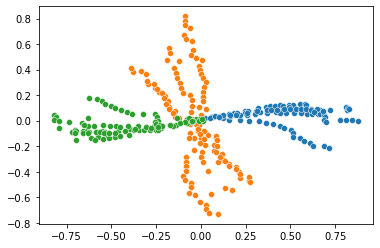

In [184]:
for i in su_labels:
    sns.scatterplot(kpca_X[clustering.labels_ == i , 0] , kpca_X[clustering.labels_ == i , 2],palette=['brown','dodgerblue','red'])
    #plt.scatter(kpca_X[clustering.labels_ == i , 0] , kpca_X[clustering.labels_ == i , 2] , label = i)
sns.legend()

In [ ]:
pd.DataFrame(kpca_X).tail()

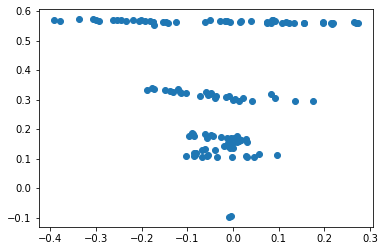

In [185]:
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

ISOMAP

In [186]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=3)
ISOX_transformed = embedding.fit_transform(df_scaled)
ISOX_transformed.shape

(323, 3)

In [187]:
ISOX=pd.DataFrame(ISOX_transformed)

In [188]:
ISOX.head()

0         1         2
0  0.001880 -0.647568 -0.532383
1  0.002354 -0.622874 -0.509270
2  0.002838 -0.596171 -0.483831
3  0.003423 -0.563514 -0.452776
4  0.003913 -0.534436 -0.424614

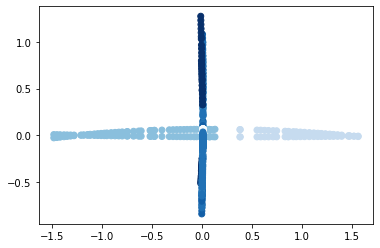

In [189]:
plt.scatter(ISOX_transformed[:, 0], ISOX_transformed[:, 1], c=df_scaled['angle'], cmap=plt.cm.Blues)
plt.scatter(ISOX_transformed[:, 0], ISOX_transformed[:, 2], c=df_scaled['angle'], cmap=plt.cm.Blues)

In [190]:
kkmeans=KMeans(n_clusters=3, n_init=10)
label = kkmeans.fit_predict(ISOX_transformed)



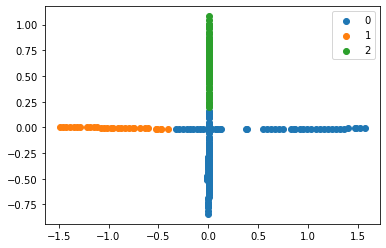

In [191]:
#Getting unique labels
 
su_labels = np.unique(label)
 
#plotting the results:
 
for i in su_labels:
    plt.scatter(ISOX_transformed[label == i , 0] , ISOX_transformed[label == i , 1] , label = i)
    #plt.scatter(ISOX_transformed[label == i , 0] , ISOX_transformed[label == i , 2] , label = i)

    plt.legend()
plt.show()

In [192]:
su_labels

array([0, 1, 2])

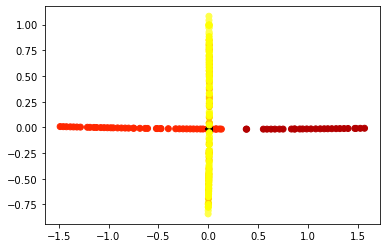

In [193]:
plt.scatter(ISOX_transformed[:, 0], ISOX_transformed[:, 1], c=df_scaled['angle'], cmap=plt.cm.hot)

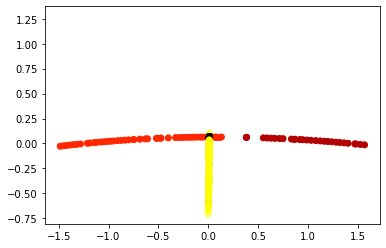

In [194]:
plt.scatter(ISOX_transformed[:, 0], ISOX_transformed[:, 2], c=df_scaled['angle'], cmap=plt.cm.hot)

In [195]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=3)
LLEX_transformed = embedding.fit_transform(df_scaled)

In [196]:
lle=pd.DataFrame(LLEX_transformed)
lle.shape

(323, 3)

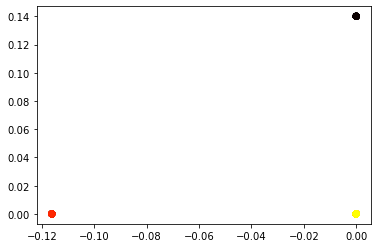

In [197]:
plt.scatter(LLEX_transformed[:, 0], LLEX_transformed[:, 1], c=df_scaled['angle'], cmap=plt.cm.hot)

In [198]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
ISOY_transformed = embedding.fit_transform(stardropped)
ISOY_transformed.shape

(323, 2)

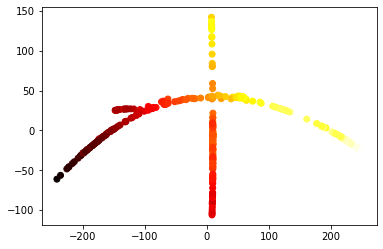

In [199]:
plt.scatter(ISOY_transformed[:, 0], ISOY_transformed[:, 1], c=df_scaled['velocity'], cmap=plt.cm.hot)

In [200]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)
LLEY_transformed = embedding.fit_transform(stardropped)

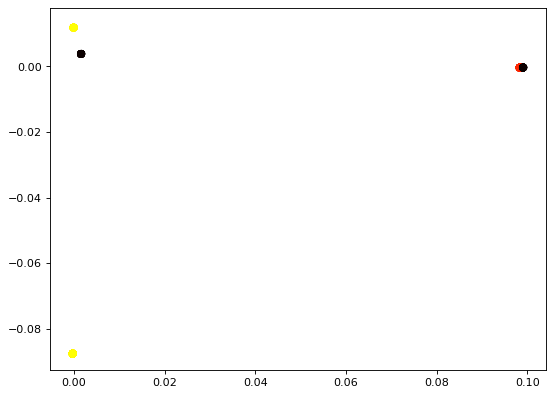

In [201]:

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(LLEY_transformed[:, 0], LLEY_transformed[:, 1], c=df_scaled['angle'], cmap=plt.cm.hot)

In [202]:
kpca_XU=pd.DataFrame(kpca_X)

In [203]:
df=pd.DataFrame(kpca_XU,clustering.labels_)

In [204]:
df

0         1         2
2  -0.635385 -0.226778 -0.080178
2  -0.635385 -0.226778 -0.080178
2  -0.635385 -0.226778 -0.080178
2  -0.635385 -0.226778 -0.080178
2  -0.635385 -0.226778 -0.080178
..       ...       ...       ...
0  -0.718705 -0.232973 -0.091539
0  -0.718705 -0.232973 -0.091539
0  -0.718705 -0.232973 -0.091539
0  -0.718705 -0.232973 -0.091539
0  -0.718705 -0.232973 -0.091539

[323 rows x 3 columns]

In [205]:
final=stardropped_Copy.join(df)

In [206]:
final

east.west  radial.position  velocity         0         1         2
0     0.644616         0.846438  0.983607 -0.718705 -0.232973 -0.091539
0     0.644616         0.846438  0.983607 -0.718705 -0.232973 -0.091539
0     0.644616         0.846438  0.983607 -0.718705 -0.232973 -0.091539
0     0.644616         0.846438  0.983607 -0.718705 -0.232973 -0.091539
0     0.644616         0.846438  0.983607 -0.718705 -0.232973 -0.091539
..         ...              ...       ...       ...       ...       ...
318   0.347863         0.096207  0.128415       NaN       NaN       NaN
319   0.339447         0.074931  0.106557       NaN       NaN       NaN
320   0.331763         0.055504  0.000000       NaN       NaN       NaN
321   0.323347         0.034228  0.019126       NaN       NaN       NaN
322   0.314565         0.012026  0.054645       NaN       NaN       NaN

[643 rows x 6 columns]

In [207]:
 df=final.rename(columns={0: 'Class_label'})

In [208]:
df

east.west  radial.position  velocity  Class_label         1         2
0     0.644616         0.846438  0.983607    -0.718705 -0.232973 -0.091539
0     0.644616         0.846438  0.983607    -0.718705 -0.232973 -0.091539
0     0.644616         0.846438  0.983607    -0.718705 -0.232973 -0.091539
0     0.644616         0.846438  0.983607    -0.718705 -0.232973 -0.091539
0     0.644616         0.846438  0.983607    -0.718705 -0.232973 -0.091539
..         ...              ...       ...          ...       ...       ...
318   0.347863         0.096207  0.128415          NaN       NaN       NaN
319   0.339447         0.074931  0.106557          NaN       NaN       NaN
320   0.331763         0.055504  0.000000          NaN       NaN       NaN
321   0.323347         0.034228  0.019126          NaN       NaN       NaN
322   0.314565         0.012026  0.054645          NaN       NaN       NaN

[643 rows x 6 columns]

In [209]:
df[df['Class_label']==0].describe()

east.west  radial.position  velocity  Class_label    1    2
count        0.0              0.0       0.0          0.0  0.0  0.0
mean         NaN              NaN       NaN          NaN  NaN  NaN
std          NaN              NaN       NaN          NaN  NaN  NaN
min          NaN              NaN       NaN          NaN  NaN  NaN
25%          NaN              NaN       NaN          NaN  NaN  NaN
50%          NaN              NaN       NaN          NaN  NaN  NaN
75%          NaN              NaN       NaN          NaN  NaN  NaN
max          NaN              NaN       NaN          NaN  NaN  NaN

In [210]:
df[df['Class_label']==1].describe()

east.west  radial.position  velocity  Class_label    1    2
count        0.0              0.0       0.0          0.0  0.0  0.0
mean         NaN              NaN       NaN          NaN  NaN  NaN
std          NaN              NaN       NaN          NaN  NaN  NaN
min          NaN              NaN       NaN          NaN  NaN  NaN
25%          NaN              NaN       NaN          NaN  NaN  NaN
50%          NaN              NaN       NaN          NaN  NaN  NaN
75%          NaN              NaN       NaN          NaN  NaN  NaN
max          NaN              NaN       NaN          NaN  NaN  NaN

In [211]:
df[df['Class_label']==2].describe()

east.west  radial.position  velocity  Class_label    1    2
count        0.0              0.0       0.0          0.0  0.0  0.0
mean         NaN              NaN       NaN          NaN  NaN  NaN
std          NaN              NaN       NaN          NaN  NaN  NaN
min          NaN              NaN       NaN          NaN  NaN  NaN
25%          NaN              NaN       NaN          NaN  NaN  NaN
50%          NaN              NaN       NaN          NaN  NaN  NaN
75%          NaN              NaN       NaN          NaN  NaN  NaN
max          NaN              NaN       NaN          NaN  NaN  NaN